In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [66]:
folder_path = "data/Zeitkonstanten"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

data = {}
timescale_mapping ={'0': 3, '2':30, '4': 300, '6': 3000, '8': 3, 'A': 30,'C':300, 'E': 3000}

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    file_data = np.loadtxt(file_path, delimiter=',', usecols=[3,4])
    data[csv_file.replace('.csv', '')] = file_data

0.6059999614546884
0.6089999763876323
0.980999928072689
1.0819999258151372


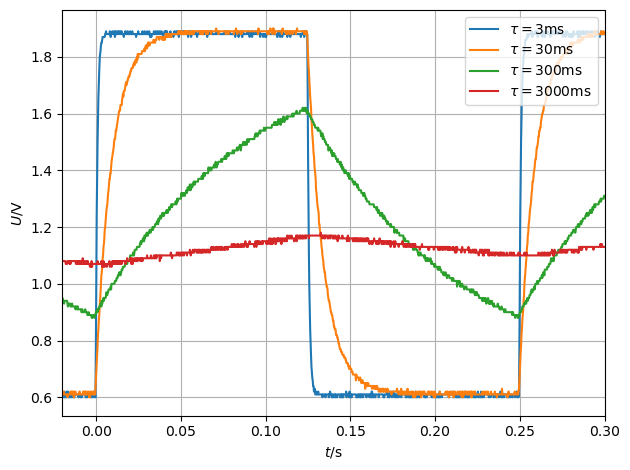

In [90]:
fig, ax = plt.subplots()#, sharey=True)

dts = {'0': 0 , '2': 0.005, '4': 0.03, '6': 0.126}


for i, k in enumerate(data):
    t = (data[k][:,0]) * 250.00001187E-3
    t += dts[k]
    U = data[k][:,1] * 499.999988824E-3

    low_level = np.mean(U[0:10])
    print(low_level)
    ax.plot(t, U, label=f'$\\tau = {timescale_mapping[k]}\\mathrm{{ms}}$')
    ax.legend(loc = 1)

ax.grid()
ax.set(xlim=[-0.02, 0.3])
ax.set(xlabel="$t / \mathrm{s}$", ylabel="$U / \\mathrm{{V}}$")
fig.tight_layout()
fig.savefig('out/lockin_timescale')